Vaccination amoung Adolescents

This dataset is from the cdc. (https://data.cdc.gov/Teen-Vaccinations/Vaccination-Coverage-among-Adolescents-13-17-Years/ee48-w5t6) It shows rates of vaccinations amoung adolescents.

To download this dataset, go to the link and click export then csv

Some questions I have about this dataset are:

Where are the geographical locations in the US that have the highest and lowest rates of vaccinations among adolescents? 

Is there a difference in vaccination rates between genders? 

Is there a difference in vaccination for types of vaccines (we do see flu vaccine avoidence in older adults, and perhaps we'll see something similar here)?

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Vaccination_Coverage_among_Adolescents__13-17_Years.csv') 
df2 = df
df.describe()


,Estimate (%),Sample Size
count,22966.000000,22966.000000
mean,66.060132,726.978969
std,24.343625,2810.522853
min,0.400000,30.000000
25%,48.200000,177.000000
50%,70.450000,301.000000
75%,88.100000,436.000000
max,100.000000,100787.000000


In [3]:
states_etc = df[df['Geography Type']=='States/Local Areas'] 
#states_filter = !(states_etc['Geography'].contains('-'))
states_only = []
states = states_etc['Geography'].unique()
for state in states:
    if not '-' in state:
        states_only.append(state)
states = states_only
states_etc = states_etc[states_etc['Geography'].isin(states)] 


In [4]:
def state_to_acronym(st):
    if " " in st:
        return st[0] + st[st.find(' ') + 1]
    else:
        return st[0] + st[len(st) -2]  + st[len(st) -1] 
len(states_only)


54

In [5]:
states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 'U.S. Virgin Islands',
 'Guam',
 'Puerto Rico']

In [6]:
vaccines

NameError: name 'vaccines' is not defined

In [8]:
plt.figure()
#states_etc = states_etc[states_etc['Geography']=='Ohio']

states_etc = states_etc[states_etc['Dose']=='≥1 Dose']
states_etc = states_etc[states_etc['Dimension Type']=='Overall']
states_etc = states_etc.sort_values(by=['Estimate (%)'])
states_etc

,Vaccine/Sample,Dose,Geography Type,Geography,Survey Year,Dimension Type,Dimension,Estimate (%),95% CI (%),Sample Size
4362,Meningococcal Conjugate,≥1 Dose,States/Local Areas,Mississippi,2015-2019,Overall,Overall,60.0,57.1 to 62.8,1643.0
4401,Meningococcal Conjugate,≥1 Dose,States/Local Areas,Wyoming,2015-2019,Overall,Overall,62.6,59.7 to 65.3,1634.0
4337,Meningococcal Conjugate,≥1 Dose,States/Local Areas,Alaska,2015-2019,Overall,Overall,67.1,64.6 to 69.6,1909.0
4364,Meningococcal Conjugate,≥1 Dose,States/Local Areas,Montana,2015-2019,Overall,Overall,70.7,68.0 to 73.2,1694.0
4354,Meningococcal Conjugate,≥1 Dose,States/Local Areas,Kansas,2015-2019,Overall,Overall,72.3,69.6 to 74.8,1713.0
...,...,...,...,...,...,...,...,...,...,...
8064,Tdap,≥1 Dose,States/Local Areas,New Hampshire,2015-2019,Overall,Overall,94.9,93.4 to 96.1,1577.0
8039,Tdap,≥1 Dose,States/Local Areas,Connecticut,2015-2019,Overall,Overall,94.9,93.4 to 96.0,1632.0
4360,Meningococcal Conjugate,≥1 Dose,States/Local Areas,Michigan,2015-2019,Overall,Overall,95.0,93.6 to 96.0,1594.0
8079,Tdap,≥1 Dose,States/Local Areas,Rhode Island,2015-2019,Overall,Overall,96.0,94.8 to 96.9,1720.0


<Figure size 432x288 with 0 Axes>

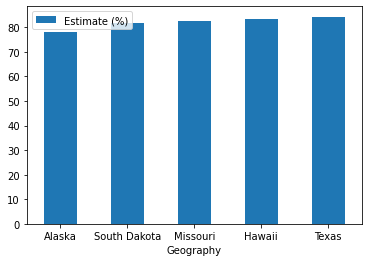

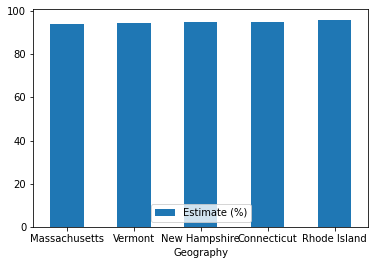

In [9]:
Tdap = states_etc[states_etc['Vaccine/Sample']=='Tdap'].head()
axTDAP = Tdap.plot.bar(x='Geography', y='Estimate (%)', rot=0)
Tdap2 = states_etc[states_etc['Vaccine/Sample']=='Tdap'].tail()
axTDAP2 = Tdap2.plot.bar(x='Geography', y='Estimate (%)', rot=0)

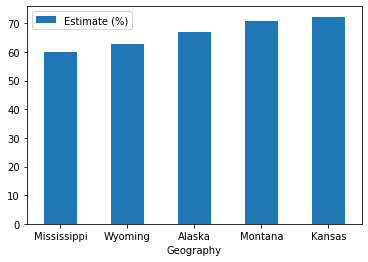

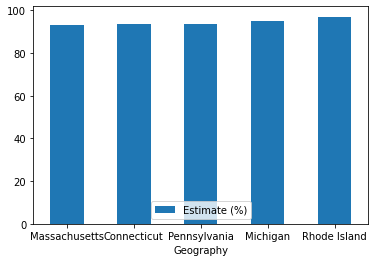

In [10]:
Meningococcal_Conjugate = states_etc[states_etc['Vaccine/Sample']=='Meningococcal Conjugate'].head()
mc2 = states_etc[states_etc['Vaccine/Sample']=='Meningococcal Conjugate'].tail()
axMC = Meningococcal_Conjugate.plot.bar(x='Geography', y='Estimate (%)', rot=0)
axMC2 = mc2.plot.bar(x='Geography', y='Estimate (%)', rot=0)

As for looking at gender diffrences:

In [13]:
plt.figure()
genders = ['≥1 Dose, Females', '≥1 Dose, Males']
dfG = df[df['Dose'].isin(genders)] 
dfG = dfG[dfG['Survey Year']=='2020']
dfG = dfG[dfG['Vaccine/Sample']=='HPV']
dfG = dfG.sort_values(by=['Estimate (%)'])
d1 = dfG[dfG['Dose']=='≥1 Dose, Females']
print(d1)

    Vaccine/Sample              Dose      Geography Type           Geography  \
936            HPV  ≥1 Dose, Females  States/Local Areas         Mississippi   
950            HPV  ≥1 Dose, Females  States/Local Areas            Oklahoma   
979            HPV  ≥1 Dose, Females  States/Local Areas       West Virginia   
955            HPV  ≥1 Dose, Females  States/Local Areas         Puerto Rico   
981            HPV  ≥1 Dose, Females  States/Local Areas             Wyoming   
..             ...               ...                 ...                 ...   
953            HPV  ≥1 Dose, Females  States/Local Areas     PA-Philadelphia   
976            HPV  ≥1 Dose, Females  States/Local Areas             Vermont   
972            HPV  ≥1 Dose, Females  States/Local Areas  TX-City of Houston   
932            HPV  ≥1 Dose, Females  States/Local Areas            Maryland   
966            HPV  ≥1 Dose, Females  States/Local Areas        Rhode Island   

    Survey Year Dimension Type    Dimen

<Figure size 432x288 with 0 Axes>

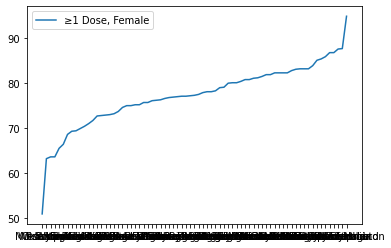

In [368]:
dt = dfG[dfG['Dose']=='≥1 Dose, Males']
dt.filter(items = [1629,1701], axis=0)
dfm = dfG[dfG['Dose']=='≥1 Dose, Females']
plt.plot(dfm['Geography'], dfm['Estimate (%)'], label='≥1 Dose, Female')



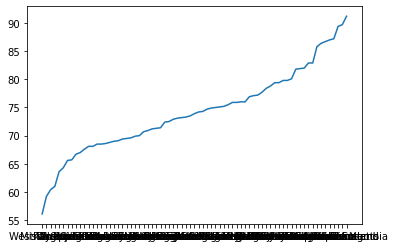

In [371]:
plt.plot(dt['Geography'], dt['Estimate (%)'], label='≥1 Dose, Male')

In [372]:
dt

,Vaccine/Sample,Dose,Geography Type,Geography,Survey Year,Dimension Type,Dimension,Estimate (%),95% CI (%),Sample Size
1697,HPV,"≥1 Dose, Males",States/Local Areas,West Virginia,2020,Age,13-17 Years,56.1,47.1 to 64.8,162.0
1654,HPV,"≥1 Dose, Males",States/Local Areas,Mississippi,2020,Age,13-17 Years,59.2,49.1 to 68.6,142.0
1646,HPV,"≥1 Dose, Males",States/Local Areas,Kansas,2020,Age,13-17 Years,60.4,51.9 to 68.4,201.0
1638,HPV,"≥1 Dose, Males",States/Local Areas,Guam,2020,Age,13-17 Years,61.0,51.3 to 69.8,157.0
1699,HPV,"≥1 Dose, Males",States/Local Areas,Wyoming,2020,Age,13-17 Years,63.6,54.4 to 71.9,181.0
...,...,...,...,...,...,...,...,...,...,...
1686,HPV,"≥1 Dose, Males",States/Local Areas,South Dakota,2020,Age,13-17 Years,87.0,81.1 to 91.3,171.0
1694,HPV,"≥1 Dose, Males",States/Local Areas,Vermont,2020,Age,13-17 Years,87.2,80.6 to 91.8,203.0
1635,HPV,"≥1 Dose, Males",States/Local Areas,District of Columbia,2020,Age,13-17 Years,89.4,81.0 to 94.4,215.0
1651,HPV,"≥1 Dose, Males",States/Local Areas,Massachusetts,2020,Age,13-17 Years,89.7,84.0 to 93.5,193.0


In [374]:
dfm

,Vaccine/Sample,Dose,Geography Type,Geography,Survey Year,Dimension Type,Dimension,Estimate (%),95% CI (%),Sample Size
936,HPV,"≥1 Dose, Females",States/Local Areas,Mississippi,2020,Age,13-17 Years,50.9,41.3 to 60.3,140.0
950,HPV,"≥1 Dose, Females",States/Local Areas,Oklahoma,2020,Age,13-17 Years,63.2,54.4 to 71.3,165.0
979,HPV,"≥1 Dose, Females",States/Local Areas,West Virginia,2020,Age,13-17 Years,63.6,54.1 to 72.1,148.0
955,HPV,"≥1 Dose, Females",States/Local Areas,Puerto Rico,2020,Age,13-17 Years,63.6,46.4 to 78.0,67.0
981,HPV,"≥1 Dose, Females",States/Local Areas,Wyoming,2020,Age,13-17 Years,65.5,55.4 to 74.4,143.0
...,...,...,...,...,...,...,...,...,...,...
953,HPV,"≥1 Dose, Females",States/Local Areas,PA-Philadelphia,2020,Age,13-17 Years,86.8,78.5 to 92.2,125.0
976,HPV,"≥1 Dose, Females",States/Local Areas,Vermont,2020,Age,13-17 Years,86.8,79.5 to 91.7,195.0
972,HPV,"≥1 Dose, Females",States/Local Areas,TX-City of Houston,2020,Age,13-17 Years,87.6,77.0 to 93.8,111.0
932,HPV,"≥1 Dose, Females",States/Local Areas,Maryland,2020,Age,13-17 Years,87.7,83.1 to 91.2,386.0


In [375]:
dt.describe()

,Estimate (%),Sample Size
count,73.000000,73.000000
mean,74.202740,461.958904
std,7.404278,1245.547185
min,56.100000,102.000000
25%,69.100000,163.000000
50%,73.900000,187.000000
75%,78.800000,238.000000
max,91.200000,10587.000000


In [377]:
dfm.describe()

,Estimate (%),Sample Size
count,73.000000,73.000000
mean,77.252055,418.753425
std,6.894465,1128.066842
min,50.900000,67.000000
25%,73.700000,146.000000
50%,77.300000,167.000000
75%,81.900000,269.000000
max,94.900000,9576.000000


From analyzing the data, I discovered:
    -there seems to be at least some preliminary evidence in answer to my questions (though not proof, due to sample size concerns etc)
in terms of what it seemed like the answers for my above questions might be from the data:
Where are the geographical locations in the US that have the highest and lowest rates of vaccinations among adolescents?
Alaska has some of the lowest, which makes sense, as it is remote. The other lowest states seem to have varied based on the given vaccine in this dataset. (though a larger sample size would be needed to get a full multi-vaccine analysis of this.) The states that had the highest rates of vaccination in the vaccines I looked at seemed to be largely in the New England area (for instance, Massachusetts was consistently there)
Is there a difference between genders?
In the study year that I looked at for the HPV vaccine, with one estimate per state for each assigned gender, female adolescents were slightly higher in vaccination rates. It would be interesting to determine whether this becomes a statistically significant difference when it is studied with a larger data set, and whether there is a significant difference in different vaccines.
Is there a difference in vaccination for types of vaccines (we do see flu vaccine avoidance in older adults, and perhaps we'll see something similar here)?
The states that had the highest and lowest vaccination rates varied pretty largely between  different vaccines in this dataset, though a larger dataset would be useful for more thorough  analysis 
